The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [232]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [233]:
# Importing the dataset
nobel = pd.read_csv("data/nobel.csv")
display(nobel)

year    category  ... death_city death_country
0    1901   Chemistry  ...     Berlin       Germany
1    1901  Literature  ...   Châtenay        France
2    1901    Medicine  ...    Marburg       Germany
3    1901       Peace  ...     Heiden   Switzerland
4    1901       Peace  ...      Paris        France
..    ...         ...  ...        ...           ...
995  2023   Chemistry  ...        NaN           NaN
996  2023   Chemistry  ...        NaN           NaN
997  2023  Literature  ...        NaN           NaN
998  2023       Peace  ...        NaN           NaN
999  2023   Economics  ...        NaN           NaN

[1000 rows x 18 columns]

Let's check how many prizes have been awarded per year.
According to the dataset, the number of prizes awarded has increased over time, starting from 6 prizes in 1901 to over 10 prizes awarded in 2023

In [234]:
print(nobel["birth_country"].value_counts())

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64


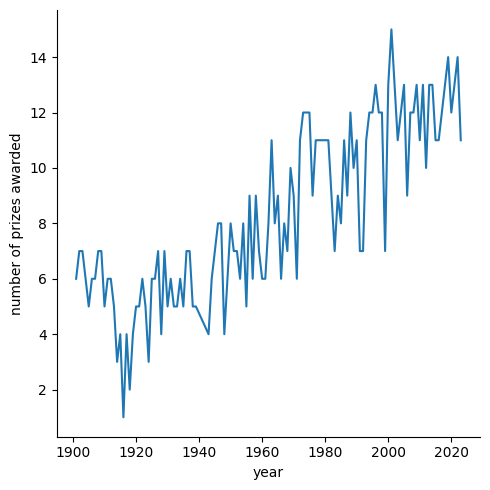

In [235]:
# summarizing count of prizes per year
year_prizes = nobel.groupby("year")[["prize"]].count()
# plotting the evolution of the number of prizes awarded over time
g = sns.relplot(x=year_prizes.index, y="prize", data=year_prizes, kind='line')
g.set(ylabel="number of prizes awarded")
plt.show()

Let's see if a scientist has been awarded more than once and who was that genius.

In [236]:
# Getting the count of prizes per awardee
scientist_tab = nobel["full_name"].value_counts()

# Getting the awardees with more than one prize
scientist_tab_top = (scientist_tab[scientist_tab >= 2]).index

# saving the full name list
repeat_list = list(scientist_tab_top)

print(scientist_tab_top)

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object')


We can see that the organization `Comité international de la Croix Rouge (International Committee of the Red Cross)` has received most Nobel awards during the 1900s in the category of Peace. As for individuals, `Marie Curie, née Sklodowska`, `John Bardeen`, `Linus Carl Pauling`, and `Frederick Sanger` have all won twice.

Let's explore the distribution of the categories awarded.

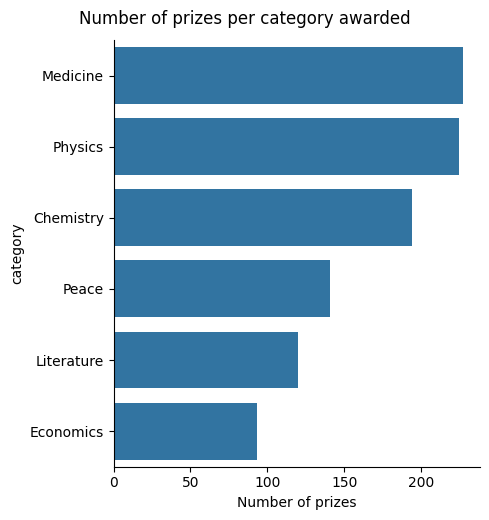

In [237]:
# Grouping by category
category_tab = nobel.groupby("category")[["category"]].count().rename(columns={"category": "num_prizes"}).sort_values("num_prizes", ascending = False)
# Bar plot
g = sns.catplot(y = "category", data = nobel, kind = "count", order = category_tab.index)
g.set(xlabel = "Number of prizes")
g.fig.suptitle("Number of prizes per category awarded", y = 1.03)
plt.show()

Medicine and Physics have been the most awarded categories since 1900, with more 200 prizes granted.

Now, let's explore which gender and birth country received most frequently the prize.

In [238]:
# Getting the top gender
top_gender = nobel["sex"].value_counts().index[0]
print("The most commonly awarded gender was " + str(top_gender) + ", with " + str(gender_tab.iloc[0,1]) + " prizes during " + str(np.min(nobel["year"])) + " and " + str(np.max(nobel["year"])) + ".")

The most commonly awarded gender was Male, with 905 prizes during 1901 and 2023.


In [239]:
# Getting the birth country
top_country = nobel["birth_country"].value_counts().index[0]
print("The most commonly awarded birth country was " + str(top_country) + ", with " + str(bcountry_tab.iloc[0,1]) + " prizes during " + str(np.min(nobel["year"])) + " and " + str(np.max(nobel["year"])) + ".")

The most commonly awarded birth country was United States of America, with 291 prizes during 1901 and 2023.


In [240]:
## getting the decade
# dividing the years by 10 and truncating
nobel["decade"] = np.trunc(nobel["year"]/10)*10
# changing type to int
nobel["decade"] = nobel["decade"].astype(int)

Let's explore the number of prizes awarded per year in the United States.

In [241]:
# Logical variable indicating if the country of birth is United States of America or not
nobel["USborn"] = nobel["birth_country"] == "United States of America"
# Group by decade
us_born_tab = nobel.groupby("decade", as_index = False)["USborn"].mean().sort_values("USborn", ascending = False)
print(us_born_tab)

# saving the decade
max_decade_usa = us_born_tab.iloc[0,0]

print("The decade with the highest proportion of US-born winners was the " + str(max_decade_usa) + "s, with " + str(np.round(100 * us_born_tab.iloc[0,1],1)) + "%")


    decade    USborn
10    2000  0.422764
9     1990  0.403846
12    2020  0.360000
8     1980  0.319588
7     1970  0.317308
11    2010  0.314050
4     1940  0.302326
5     1950  0.291667
6     1960  0.265823
3     1930  0.250000
1     1910  0.075000
2     1920  0.074074
0     1900  0.017544
The decade with the highest proportion of US-born winners was the 2000s, with 42.3%


Now let's explore the category were females were mostly awarded and in which decade.

In [242]:
# Logical variable indicating if the winner is a woman or not
nobel["isfemale"] = nobel["sex"] == "Female"

# grouping by category and decade
female_tab = nobel.groupby(["decade", "category"], as_index = False)["isfemale"].mean().sort_values("isfemale", ascending = False)

# saving the results as a dictionary
max_female_dict = {female_top1[0]: female_top1[1]}

print("The decade and category pair having the highest proportion of female laureates was " + str(max_female_dict) + ".")

The decade and category pair having the highest proportion of female laureates was {2020: 'Literature'}.


Now, let's discover who was the first woman to receive a Nobel Prize, and in what category

In [243]:
# sorting the female subset by year
female_first = nobel[nobel["isfemale"] == True].sort_values("year").loc[:,("full_name","year","category")].head(1)
display(female_first)
# saving the full_name
first_woman_name = female_first.iloc[0,0]
# saving the category
first_woman_category = female_first.iloc[0,2]

print("The first woman to receive a Nobel Prize was " + first_woman_name + " in the category of " + first_woman_category + " in " + str(female_first.iloc[0,1]) + ".")

full_name  year category
19  Marie Curie, née Sklodowska  1903  Physics

The first woman to receive a Nobel Prize was Marie Curie, née Sklodowska in the category of Physics in 1903.


In summary

In [244]:
# What is the most commonly awarded gender?
print(top_gender)
# What is the most commonly awarded birth country?
print(top_country)
# What decade had the highest proportion of US-born winners?
print(max_decade_usa)
# What decade and category pair had the highest proportion of female laureates?
print(max_female_dict)
# Who was the first woman to receive a Nobel Prize?
print(first_woman_name)
# What was the category awarding the first woman to receive a Nobel Prize?
print(first_woman_category)
# Which individuals or organizations have won multiple Nobel Prizes throughout the years?
print(repeat_list)

Male
United States of America
2000
{2020: 'Literature'}
Marie Curie, née Sklodowska
Physics
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
